<a href="https://www.kaggle.com/code/kamalapousajja/cause-of-deaths-analysis?scriptVersionId=127539922" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

> **Cause of Deaths Analysis**

The dataset contains cause of deaths information around the world from 1990 to 2019.

Key finding topics in this analysis.

1. Percentage of cause of deaths
2. Total number of deaths around the world
3. Top 10 Countries with the highest number of deaths 
4. Top 10 Countries with the lowest number of deaths 
5. Time series of total number of deaths around the world 
6. Time series compare the total number of deaths between top 10 countries
7. Percentage of cause of deaths in New Zealand
8. Time series of total number of deaths in New Zealand 
9. Top 5 cause of deaths in New Zealand
10. Time series of top 5 cause of deaths in New Zealand 
11. Time series to compare the total deaths between New Zealand and Australia 
12. Cause of deaths in New Zealand in 2019
13. Top 5 cause of deaths in New Zealand in 2019
14. Time series of total number of deaths from road injuries in New Zealand
15. Time series of total number of deaths from self-harm in New Zealand
16. Time series of data not related to disease in New Zealand
17. Bar chart race of data not related to diseases in New Zealand



# Import Libraries and Read data

In [1]:
# Install the package for bar chart racing

!pip install bar-chart-race

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 4.0 MB/s eta 0:00:00


In [2]:
#Import Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import bar_chart_race as bcr


# Ignore any further warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read Dataset

df = pd.read_csv('/kaggle/input/cause-of-deaths-around-the-world/cause_of_deaths.csv')

In [4]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [5]:
df.shape

(6120, 34)

In [6]:
#Check for data type

df.dtypes

Country/Territory                             object
Code                                          object
Year                                           int64
Meningitis                                     int64
Alzheimer's Disease and Other Dementias        int64
Parkinson's Disease                            int64
Nutritional Deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal Violence                         int64
Maternal Disorders                             int64
HIV/AIDS                                       int64
Drug Use Disorders                             int64
Tuberculosis                                   int64
Cardiovascular Diseases                        int64
Lower Respiratory Infections                   int64
Neonatal Disorders                             int64
Alcohol Use Disorders                          int64
Self-harm                                     

In [7]:
#Check for missing data

df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In [8]:
#Check for duplicate data

df.duplicated().sum()

0

In [9]:
#Rename column

df=df.rename(columns={'Country/Territory':'Country'})

df.head()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [10]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'G

In [11]:
print(f'There are  {len(df["Country"].unique())}  countries')

There are  204  countries


In [12]:
#Check for number of unique records present in the data

df.nunique(axis=0)

Country                                        204
Code                                           204
Year                                            30
Meningitis                                    2020
Alzheimer's Disease and Other Dementias       3037
Parkinson's Disease                           1817
Nutritional Deficiencies                      2147
Malaria                                       1723
Drowning                                      1875
Interpersonal Violence                        2142
Maternal Disorders                            1818
HIV/AIDS                                      2412
Drug Use Disorders                             876
Tuberculosis                                  2843
Cardiovascular Diseases                       5225
Lower Respiratory Infections                  4106
Neonatal Disorders                            3553
Alcohol Use Disorders                         1287
Self-harm                                     2758
Exposure to Forces of Nature   

In [13]:
#Statistical Information 

df.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


# Exploratory Analysis and Visualisation

# 1. Percentage of Cause of Deaths

In [14]:
df.head()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [15]:
#Create a new column for the total number of deaths (Sum all cause of deaths)

cause_of_deaths = [col for col in df.columns if col not in ('Country', 'Code', 'Year')]

df['Total_deaths'] = df[cause_of_deaths].sum(axis=1)

df.head()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_deaths
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,147971
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,156844
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,169156
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,182230
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,194795


In [16]:
#Find the total number of each disease and rename columns for the chart

disease_df = df[cause_of_deaths].sum().to_frame().reset_index()
disease_df.rename(columns={"index": "Disease", 0:"Total cases"}, inplace=True)
disease_df

,Disease,Total cases
0,Meningitis,10524572
1,Alzheimer's Disease and Other Dementias,29768839
2,Parkinson's Disease,7179795
3,Nutritional Deficiencies,13792032
4,Malaria,25342676
5,Drowning,10301999
6,Interpersonal Violence,12752839
7,Maternal Disorders,7727046
8,HIV/AIDS,36364419
9,Drug Use Disorders,2656121


In [17]:
fig = px.sunburst(disease_df, 
                  path=['Disease'], 
                  values='Total cases'
                  )

fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Cause of Deaths', title_x=0.5, font_size=15)
fig.show()

In [18]:
#Another Visualisation by Treemap

fig = px.treemap(disease_df, 
                 path = [px.Constant('Total cases'), 'Disease'], 
                 values = 'Total cases'
                 )

fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Cause of Deaths', title_x=0.5, font_size=15)
fig.show()

# 2. Total Number of Deaths Around the World

In [19]:
country_df = df.groupby('Country')['Total_deaths'].sum().sort_values(ascending=False).reset_index()
country_df

,Country,Total_deaths
0,China,265408106
1,India,238158165
2,United States,71197802
3,Russia,59591155
4,Indonesia,44046941
...,...,...
199,Cook Islands,3999
200,Tuvalu,2962
201,Nauru,2249
202,Niue,591


In [20]:
fig = px.sunburst(country_df, 
                  path=['Country'], 
                  values='Total_deaths'
                  )

fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Total Number of Deaths Around the World', title_x=0.5, font_size=15)
fig.show()

In [21]:
#Another Visualisation by Treemap

fig = px.treemap(country_df, 
                 path = [px.Constant('Total_deaths'), 'Country'], 
                 values = 'Total_deaths'
                 )

fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Total Number of Deaths Around the World', title_x=0.5, font_size=15)
fig.show()

In [22]:
#Another visualisation by Choropleth Map

fig = px.choropleth(country_df,
                    locations='Country', 
                    locationmode= 'country names', 
                    color= 'Total_deaths', 
                    range_color=[1,10000000], 
                    hover_name='Country')

fig.update_layout(title={'text' : 'Total Number of Deaths around the world'}, title_x=0.5, font_size=15)
fig.show()

# Interactive Choropleth Map

In [23]:
fig = px.choropleth(df,
                    locations='Country',
                    locationmode= 'country names',
                    color='Total_deaths',
                    range_color=[1,2000000], 
                    hover_name='Country', 
                    animation_frame='Year',
                    width=1000
                   )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

> **You can change the year or click at the botton to play.**

# 3. Top 10 Countries with the Highest Number of Deaths 

In [24]:
#Find the total number of deaths by country.

Top10_deaths = df.groupby('Country')['Total_deaths'].sum().sort_values(ascending=False).head(10).reset_index()

Top10_deaths

,Country,Total_deaths
0,China,265408106
1,India,238158165
2,United States,71197802
3,Russia,59591155
4,Indonesia,44046941
5,Nigeria,43670014
6,Pakistan,38151878
7,Brazil,32674112
8,Japan,31922807
9,Germany,25559667


Text(0.5, 1.0, 'Top 10 Countries with the Highest Number of Deaths')

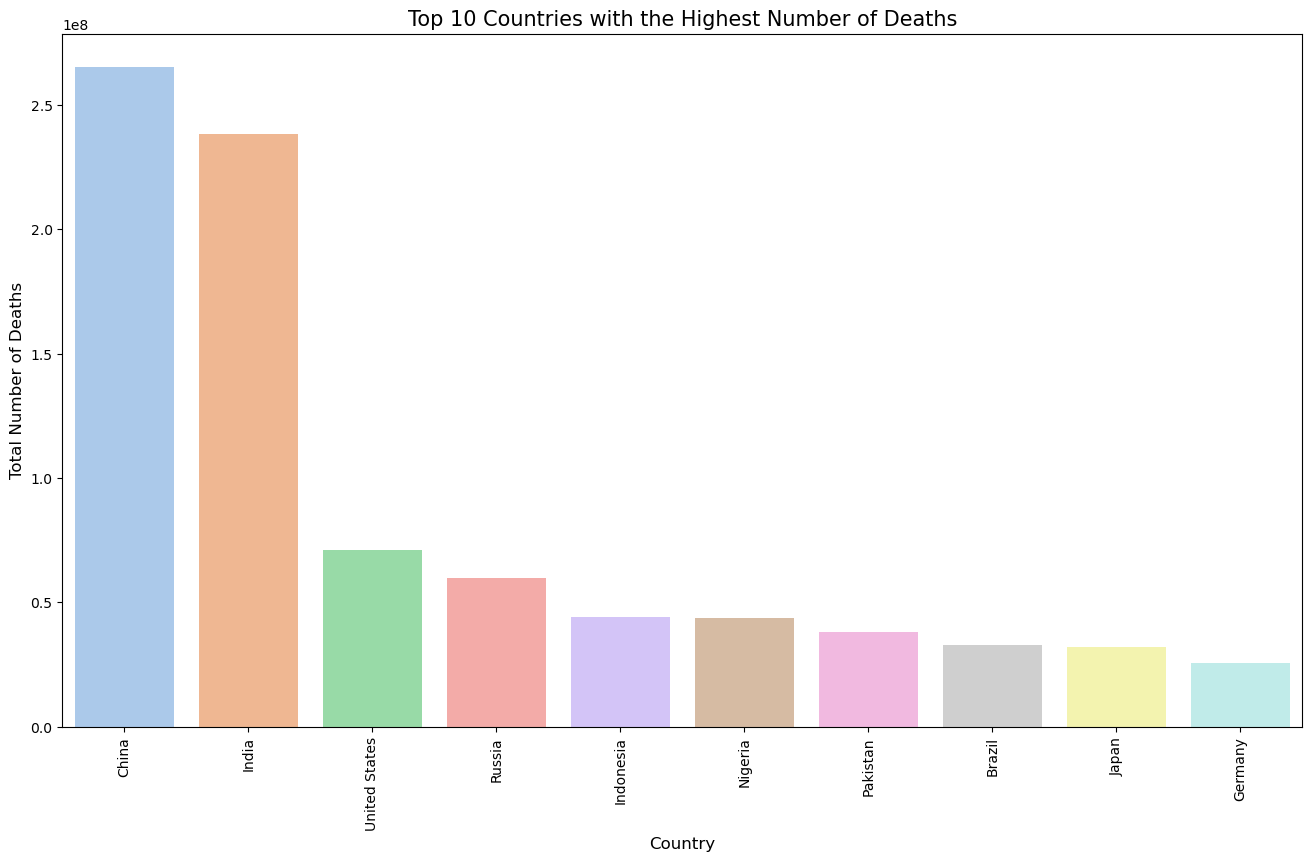

In [25]:
plt.figure(figsize=(16,9))

sns.barplot(data = Top10_deaths, 
            x = 'Country', 
            y = 'Total_deaths', 
            palette = 'pastel'
            )

plt.xticks(rotation = 90)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Total Number of Deaths', fontsize = 12)
plt.title('Top 10 Countries with the Highest Number of Deaths', fontsize =15)

# 4. Top 10 Countries with the Lowest Number of Deaths 

In [26]:
Low10_deaths = df.groupby('Country')['Total_deaths'].sum().sort_values(ascending=True).head(10).reset_index()

Low10_deaths

,Country,Total_deaths
0,Tokelau,299
1,Niue,591
2,Nauru,2249
3,Tuvalu,2962
4,Cook Islands,3999
5,Palau,4814
6,San Marino,6761
7,Northern Mariana Islands,7827
8,American Samoa,8619
9,Marshall Islands,10186


Text(0.5, 1.0, 'Top 10 Countries with the Lowest Number of Deaths')

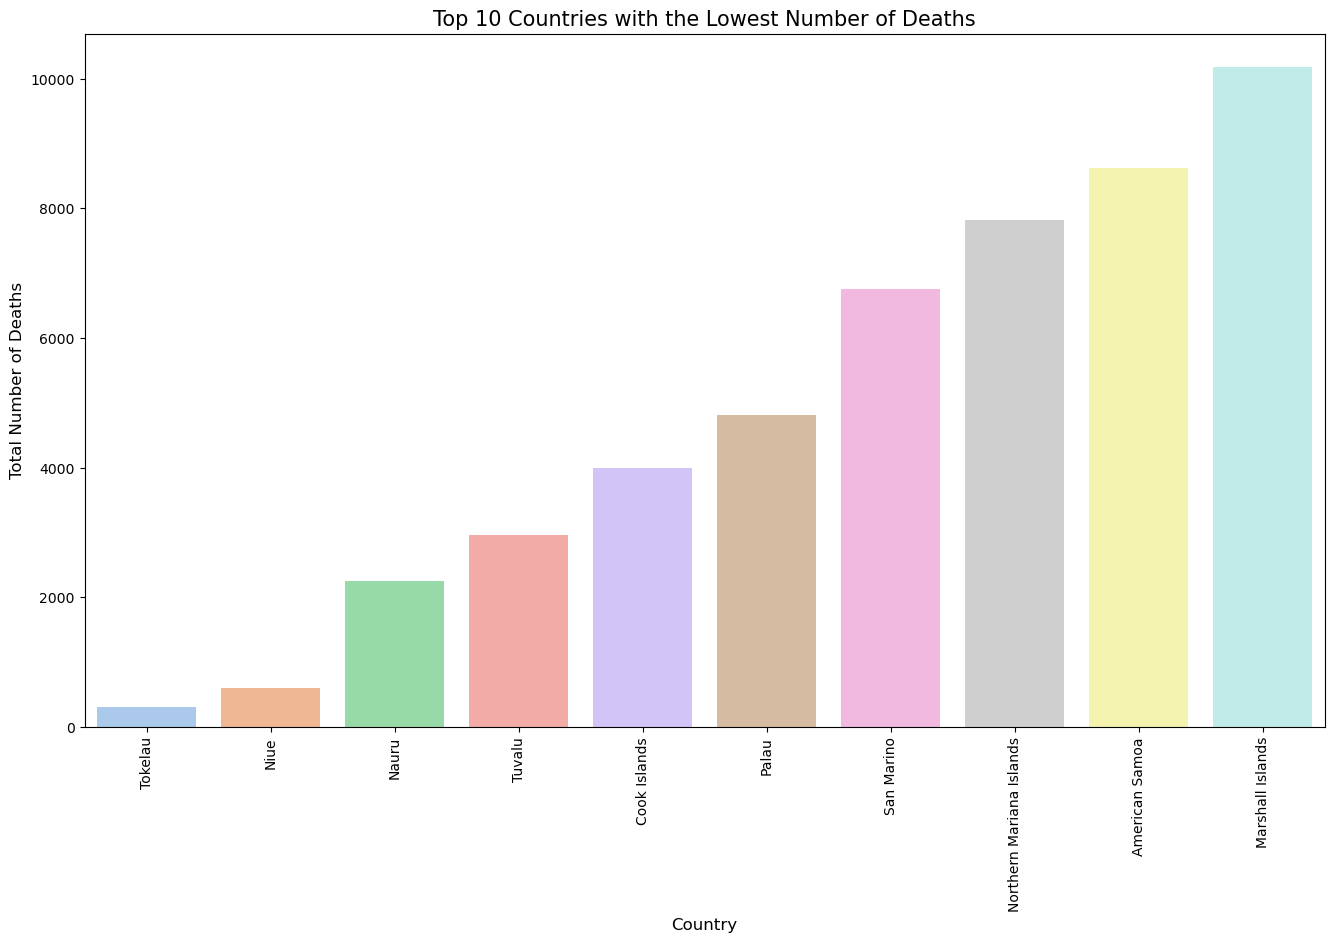

In [27]:
plt.figure(figsize=(16,9))

sns.barplot(data = Low10_deaths, 
            x = 'Country', 
            y = 'Total_deaths', 
            palette = 'pastel'
            )

plt.xticks(rotation = 90)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Total Number of Deaths', fontsize = 12)
plt.title('Top 10 Countries with the Lowest Number of Deaths', fontsize =15)

# 5. Time Series of Total Number of Deaths Around the World 

In [28]:
Deaths_by_year = df.groupby('Year')['Total_deaths'].sum().reset_index()

Deaths_by_year

,Year,Total_deaths
0,1990,43518516
1,1991,44059729
2,1992,44459130
3,1993,45185713
4,1994,46182613
5,1995,46177018
6,1996,46320827
7,1997,46672370
8,1998,47066088
9,1999,47652090


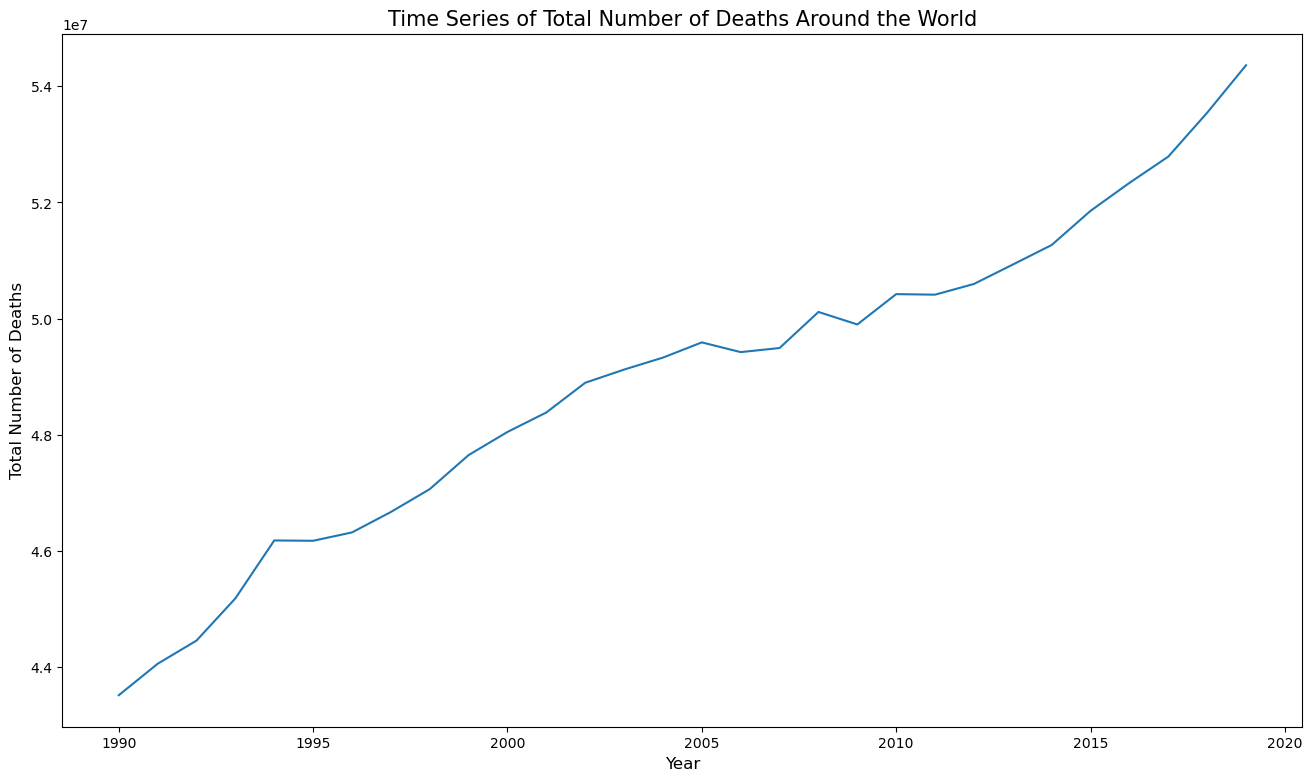

In [29]:
plt.figure(figsize=(16,9))

sns.lineplot(data = Deaths_by_year,
             x='Year',
             y = 'Total_deaths'
            )

plt.xlabel('Year',fontsize =12)
plt.ylabel('Total Number of Deaths',fontsize =12)
plt.title('Time Series of Total Number of Deaths Around the World', fontsize=15)

plt.show()

# 6. Time Series Compare the Total Number of Deaths Between Top 10 Countries

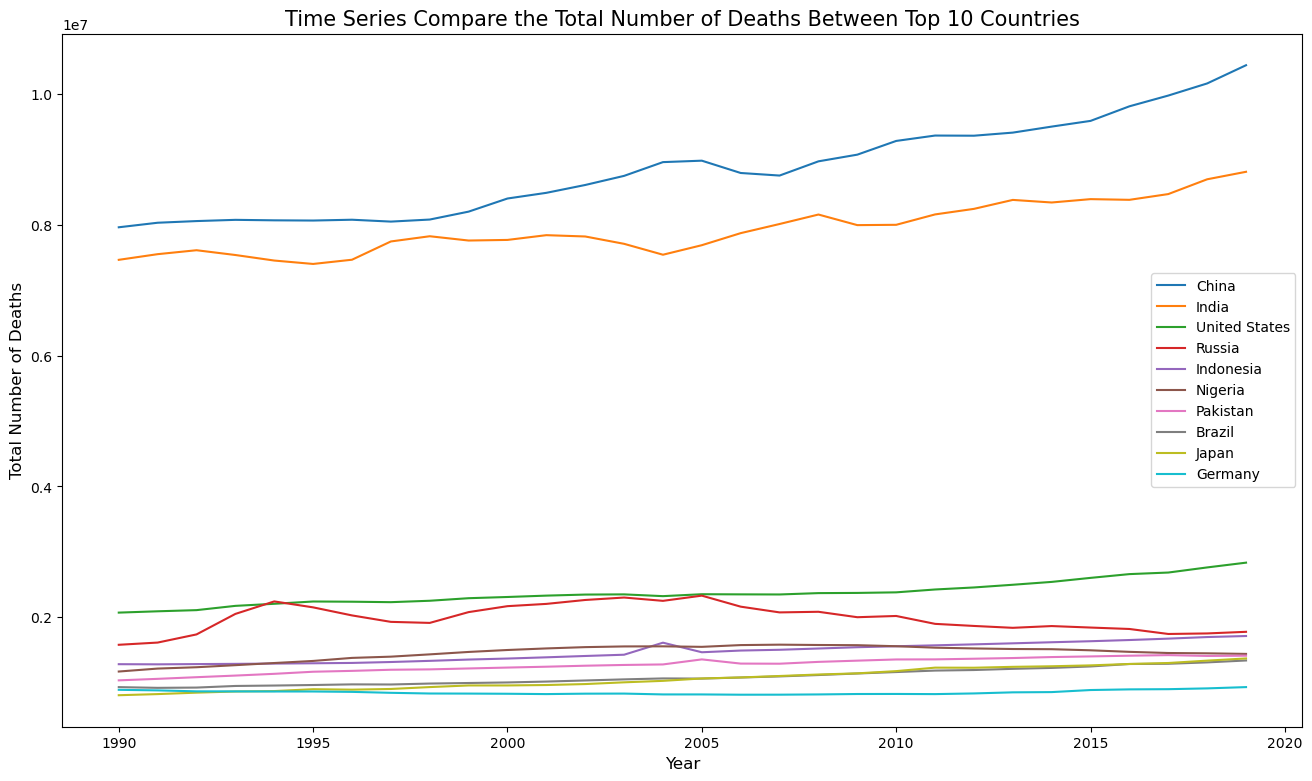

In [30]:
#Select data from Top10 countries that have the highest number of deaths

plt.figure(figsize=(16,9))

for i in Top10_deaths.Country:
    a= df[df['Country']==i]
    sns.lineplot(data=a, x='Year', y='Total_deaths',label=i)
    
plt.xlabel('Year',fontsize =12)
plt.ylabel('Total Number of Deaths',fontsize =12)
plt.title('Time Series Compare the Total Number of Deaths Between Top 10 Countries', fontsize=15)

plt.show()

# New Zealand Analysis

> **As I live in New Zealand, I will be focusing on analysing data for my country :)**

In [31]:
#Create a new data frame of New Zealand

New_Zealand=df[df['Country']=='New Zealand']
New_Zealand.head()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_deaths
3780,New Zealand,NZL,1990,26,770,160,12,0,72,79,...,308,8,7,779,1542,192,750,36,2,25030
3781,New Zealand,NZL,1991,26,807,165,12,0,69,74,...,315,8,7,734,1557,196,754,35,2,25035
3782,New Zealand,NZL,1992,26,844,174,12,0,68,78,...,334,8,7,707,1616,199,764,36,2,25450
3783,New Zealand,NZL,1993,29,883,182,12,0,68,64,...,349,8,8,684,1667,204,770,36,2,25806
3784,New Zealand,NZL,1994,28,919,188,11,0,67,70,...,355,8,7,649,1698,205,767,34,2,25703


# 7. Percentage of Cause of Deaths in New Zealand

In [32]:
#Find the total number of each disease and rename columns for the chart

NZ_disease = New_Zealand[cause_of_deaths].sum().to_frame().reset_index()
NZ_disease.rename(columns={"index": "Disease", 0:"Total cases"}, inplace=True)
NZ_disease

,Disease,Total cases
0,Meningitis,682
1,Alzheimer's Disease and Other Dementias,40940
2,Parkinson's Disease,8236
3,Nutritional Deficiencies,356
4,Malaria,0
5,Drowning,1788
6,Interpersonal Violence,1934
7,Maternal Disorders,199
8,HIV/AIDS,671
9,Drug Use Disorders,1411


In [33]:
fig = px.sunburst(NZ_disease, 
                  path=['Disease'], 
                  values='Total cases'
                  )

fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Cause of Deaths in New Zealand', title_x=0.5, font_size=15)
fig.show()

In [34]:
#Another Visualisation by Treemap

fig = px.treemap(NZ_disease, 
                 path = [px.Constant('Total cases'), 'Disease'], 
                 values = 'Total cases'
                 )

fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Cause of Deaths in New Zealand', title_x=0.5, font_size=15)
fig.show()

# 8. Time Series of Total Number of Deaths in New Zealand

In [35]:
NZ_Deaths_by_year = New_Zealand.groupby('Year')['Total_deaths'].sum().reset_index()

NZ_Deaths_by_year

,Year,Total_deaths
0,1990,25030
1,1991,25035
2,1992,25450
3,1993,25806
4,1994,25703
5,1995,26253
6,1996,26395
7,1997,26215
8,1998,25752
9,1999,26213


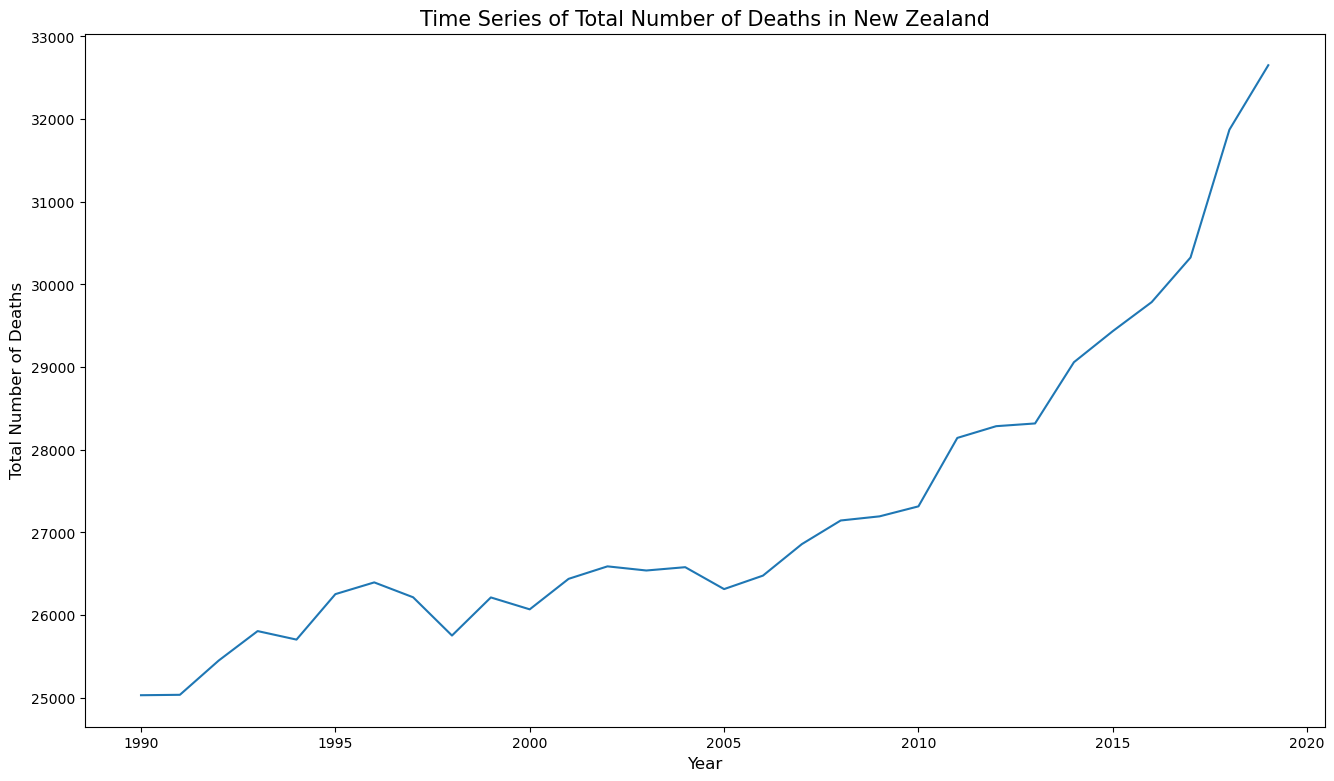

In [36]:
plt.figure(figsize=(16,9))

sns.lineplot(data = NZ_Deaths_by_year,
             x='Year',
             y = 'Total_deaths'
            )

plt.xlabel('Year',fontsize =12)
plt.ylabel('Total Number of Deaths',fontsize =12)
plt.title('Time Series of Total Number of Deaths in New Zealand', fontsize=15)

plt.show()

# 9. Top 5 Cause of Deaths in New Zealand

In [37]:
NZ_top5_disease = NZ_disease.groupby('Disease')['Total cases'].sum().sort_values(ascending=False).head(5).reset_index()

NZ_top5_disease

,Disease,Total cases
0,Cardiovascular Diseases,328560
1,Neoplasms,247515
2,Chronic Respiratory Diseases,57809
3,Alzheimer's Disease and Other Dementias,40940
4,Digestive Diseases,25560


In [38]:
fig = go.Figure(data=[go.Pie(labels=NZ_top5_disease['Disease'],
                             values=NZ_top5_disease['Total cases'],
                             hole=.7,
                             title = 'Top 5 Cause of deaths')])

fig.update_layout(title='Top 5 Cause of Deaths in New Zealand',title_x=0.5, font_size=15, showlegend = False)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# 10. Time series of Top 5 Cause of Deaths in New Zealand

In [39]:
New_Zealand.head()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_deaths
3780,New Zealand,NZL,1990,26,770,160,12,0,72,79,...,308,8,7,779,1542,192,750,36,2,25030
3781,New Zealand,NZL,1991,26,807,165,12,0,69,74,...,315,8,7,734,1557,196,754,35,2,25035
3782,New Zealand,NZL,1992,26,844,174,12,0,68,78,...,334,8,7,707,1616,199,764,36,2,25450
3783,New Zealand,NZL,1993,29,883,182,12,0,68,64,...,349,8,8,684,1667,204,770,36,2,25806
3784,New Zealand,NZL,1994,28,919,188,11,0,67,70,...,355,8,7,649,1698,205,767,34,2,25703


In [40]:
#Create Time series of 5 cause of deaths - Cardiovascular Diseases, Neoplasms, Chronic Respiratory Diseases, Alzheimer's Disease and Other Dementias, Digestive Diseases

fig = go.Figure()
fig.add_trace(go.Scatter(x = New_Zealand['Year'],
                         y = New_Zealand['Cardiovascular Diseases'],
                         mode = 'lines',
                         name = 'Cardiovascular Diseases',
                         marker_color = 'Red',
                         line = dict(dash = 'dashdot')))

fig.add_trace(go.Scatter(x = New_Zealand['Year'],
                         y = New_Zealand['Neoplasms'],
                         mode = 'lines',
                         name = 'Neoplasms',
                         marker_color = 'DarkOrchid',
                         line = dict(dash = 'dot')))

fig.add_trace(go.Scatter(x = New_Zealand['Year'],
                         y = New_Zealand['Chronic Respiratory Diseases'],
                         mode = 'lines',
                         name = 'Chronic Respiratory Diseases',
                         marker_color = 'RoyalBlue'
                         ))

fig.add_trace(go.Scatter(x = New_Zealand['Year'],
                         y = New_Zealand["Alzheimer's Disease and Other Dementias"],
                         mode = 'lines',
                         name = "Alzheimer's Disease and Other Dementias",
                         marker_color = 'Black',
                         line = dict(dash = 'dot')))
                                         

fig.add_trace(go.Scatter(x = New_Zealand['Year'],
                         y = New_Zealand['Digestive Diseases'],
                         mode = 'lines',
                         name = 'Digestive Diseases',
                         marker_color = 'LightSeaGreen',
                         line = dict(dash = 'dash')))
                         
fig.update_layout(title = '<b>Time Series of Top 5 Cause of Deaths in New Zealand<b>',
                  title_x = 0.5,
                  title_font= dict(size = 20),
                  xaxis_title = 'Year',
                  yaxis_title = 'Total Number of Deaths',
                  template = 'plotly_white')

fig.show()

# 11. Time Series to Compare Between New Zealand and Australia

In [41]:
#Create a new data frame of Australia

Australia = df[df['Country']=='Australia']
Australia.head()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_deaths
270,Australia,AUS,1990,99,3669,880,77,0,295,380,...,1712,47,47,2739,6966,1394,3944,147,6,113589
271,Australia,AUS,1991,96,3820,909,79,0,282,360,...,1743,47,49,2543,7006,1386,3911,175,6,113521
272,Australia,AUS,1992,97,3984,957,84,0,281,330,...,1804,45,52,2420,7235,1392,3926,149,7,115530
273,Australia,AUS,1993,86,4149,998,89,0,271,337,...,1863,46,58,2296,7312,1387,3907,145,7,116309
274,Australia,AUS,1994,86,4342,1056,97,0,269,344,...,1946,47,64,2255,7523,1415,3971,178,7,119118


In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = New_Zealand['Year'],
                         y = New_Zealand['Total_deaths'],
                         mode = 'lines',
                         name = 'New Zealand',
                         marker_color = 'Red'))

fig.add_trace(go.Scatter(x = Australia['Year'],
                         y = Australia['Total_deaths'],
                         mode = 'lines',
                         name = 'Australia',
                         marker_color = 'Blue'))

fig.update_layout(title = '<b>Time Series to Compare the Between New Zealand and Australia<b>',
                  title_x = 0.5,
                  title_font= dict(size = 20),
                  xaxis_title = 'Year',
                  yaxis_title = 'Total Number of Deaths',
                  template = 'plotly_white')

fig.show()

# 12. Cause of Deaths in New Zealand in 2019

> The latest year from this dataset is 2019. 
> 
> So I would like to know the latest information of cause of deaths in New Zealand.

In [43]:
New_Zealand.tail()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_deaths
3805,New Zealand,NZL,2015,12,1846,359,14,0,51,57,...,803,8,11,344,2120,277,996,22,1,29435
3806,New Zealand,NZL,2016,12,1902,362,14,0,50,58,...,816,8,11,345,2147,279,1003,22,1,29786
3807,New Zealand,NZL,2017,13,1959,369,15,0,50,58,...,834,8,12,346,2194,280,1017,22,1,30326
3808,New Zealand,NZL,2018,13,2019,392,15,0,50,58,...,887,8,12,350,2329,293,1066,23,1,31872
3809,New Zealand,NZL,2019,13,2066,403,15,0,50,58,...,915,8,12,352,2396,297,1088,23,1,32652


In [44]:
#Make a new data frame of New Zealand year 2019

NZ_2019 = New_Zealand[New_Zealand['Year'] == 2019]
NZ_2019

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_deaths
3809,New Zealand,NZL,2019,13,2066,403,15,0,50,58,...,915,8,12,352,2396,297,1088,23,1,32652


In [45]:
#Find the total number of each disease and rename columns for the chart

disease_2019 = NZ_2019[cause_of_deaths].sum().to_frame().reset_index()
disease_2019.rename(columns={"index": "Disease", 0:"Total cases"}, inplace=True)
disease_2019

,Disease,Total cases
0,Meningitis,13
1,Alzheimer's Disease and Other Dementias,2066
2,Parkinson's Disease,403
3,Nutritional Deficiencies,15
4,Malaria,0
5,Drowning,50
6,Interpersonal Violence,58
7,Maternal Disorders,6
8,HIV/AIDS,9
9,Drug Use Disorders,65


In [46]:
fig = px.treemap(disease_2019, 
                 path = [px.Constant('Total cases'), 'Disease'], 
                 values = 'Total cases'
                 )

fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Cause of Deaths in New Zealand in 2019', title_x=0.5, font_size=15)
fig.show()

# 13. Top 5 Cause of Deaths in New Zealand in 2019

In [47]:
top5_2019 = disease_2019.groupby('Disease')['Total cases'].sum().sort_values(ascending=False).head(5).reset_index()

top5_2019

,Disease,Total cases
0,Cardiovascular Diseases,11948
1,Neoplasms,10584
2,Chronic Respiratory Diseases,2396
3,Alzheimer's Disease and Other Dementias,2066
4,Digestive Diseases,1088


Text(0.5, 1.0, 'Top 5 Cause of Deaths in New Zealand in 2019')

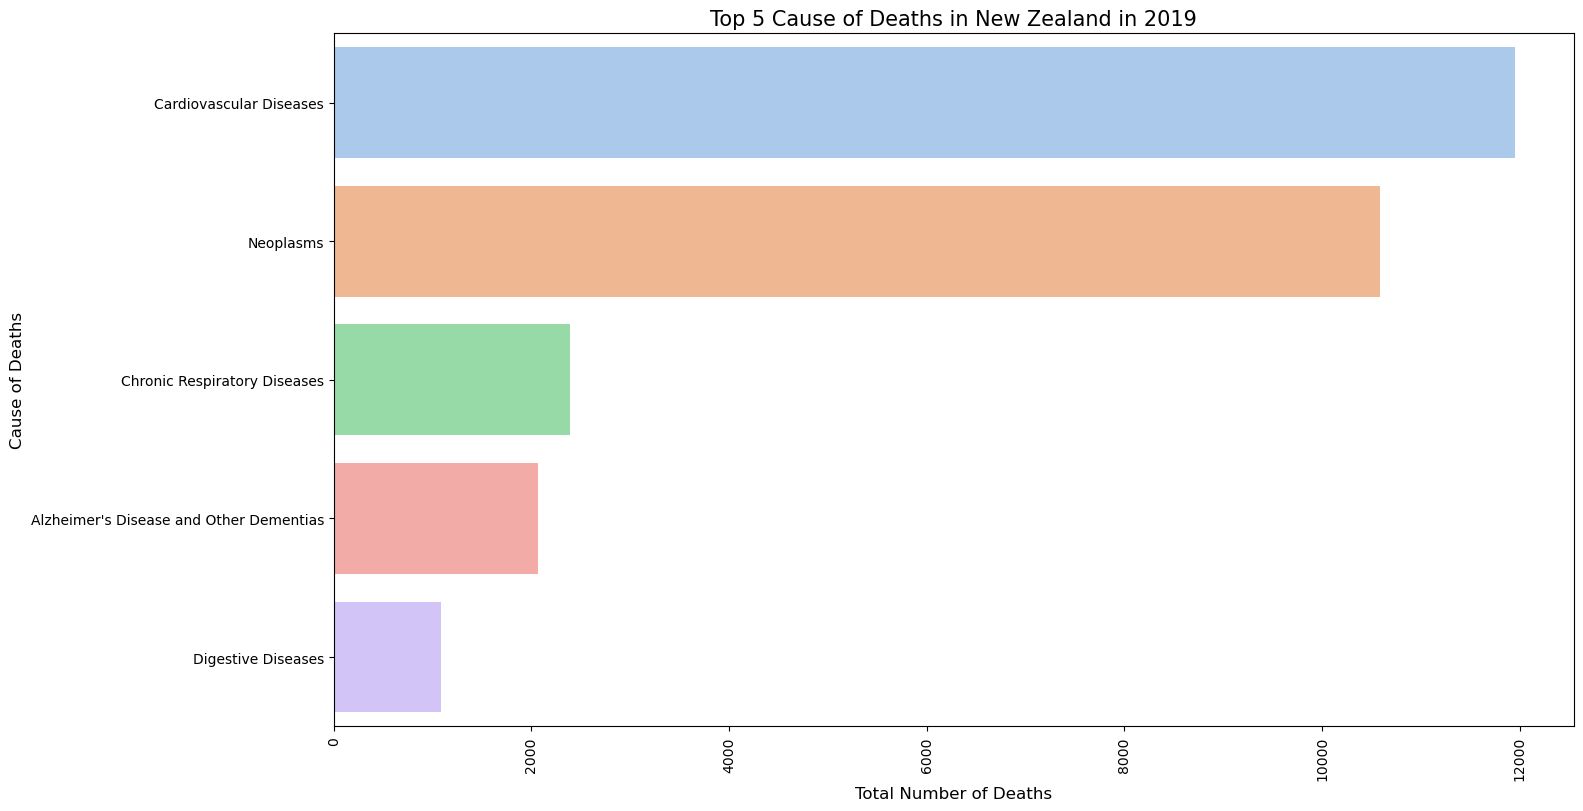

In [48]:
plt.figure(figsize=(16,9))

sns.barplot(data = top5_2019, 
            x = 'Total cases', 
            y = 'Disease', 
            palette = 'pastel'
            )

plt.xticks(rotation = 90)
plt.xlabel('Total Number of Deaths', fontsize = 12)
plt.ylabel('Cause of Deaths', fontsize = 12)
plt.title('Top 5 Cause of Deaths in New Zealand in 2019', fontsize =15)

In [49]:
fig = go.Figure(data=[go.Pie(labels=top5_2019['Disease'],
                             values=top5_2019['Total cases'],
                             hole=.7,
                             title = 'Top 5 Cause of deaths')])

fig.update_layout(title='Top 5 Cause of Deaths in New Zealand in 2019',title_x=0.5, font_size=15, showlegend = False)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# 14. Time Series of Total Number of Deaths From Road Injuries in New Zealand

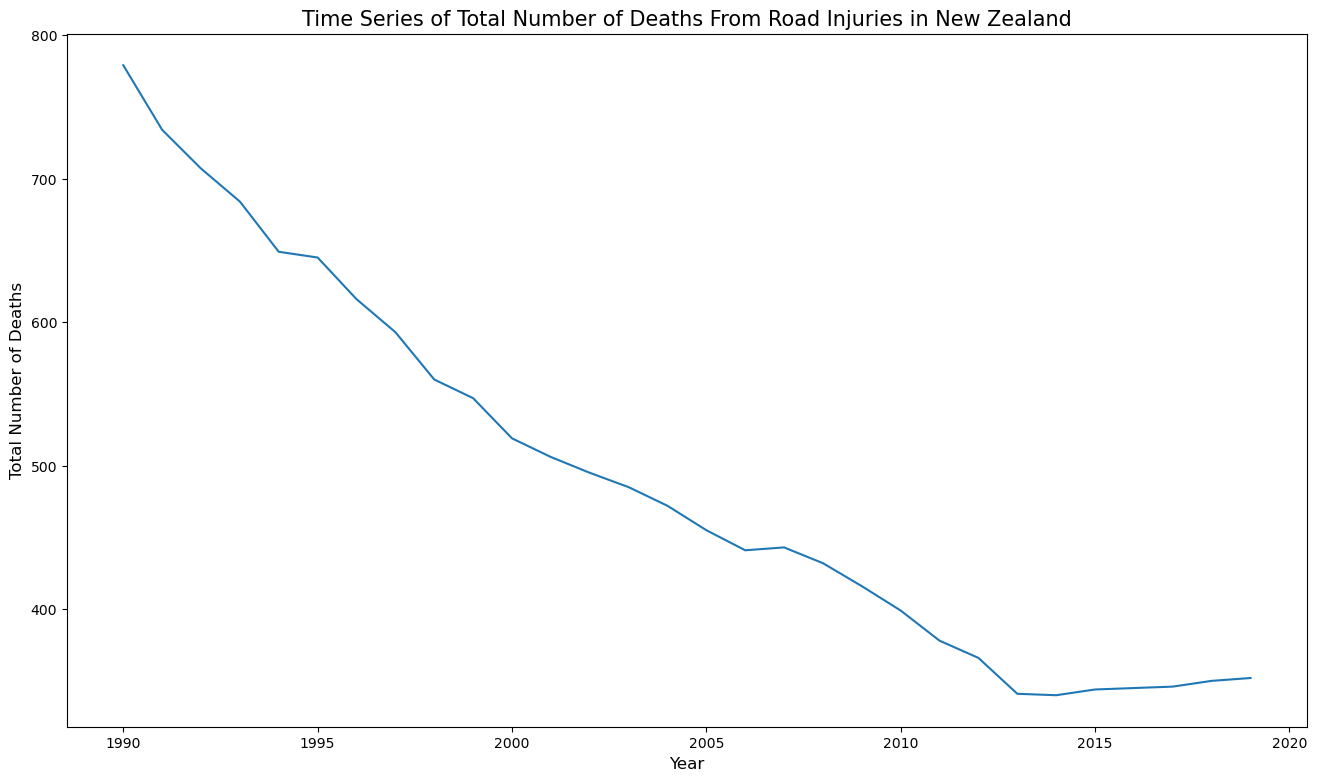

In [50]:
plt.figure(figsize=(16,9))

sns.lineplot(New_Zealand,
             x='Year',
             y = 'Road Injuries'
            )

plt.xlabel('Year',fontsize =12)
plt.ylabel('Total Number of Deaths',fontsize =12)
plt.title('Time Series of Total Number of Deaths From Road Injuries in New Zealand', fontsize=15)

plt.show()

# 15. Time Series of Total Number of Deaths From Self-harm in New Zealand

In [51]:
#Try to use another package for Line chart

fig = go.Figure()
fig.add_trace(go.Scatter(x = New_Zealand['Year'],
                         y = New_Zealand['Self-harm'],
                         mode = 'lines',
                         name = 'New Zealand',
                         marker_color = 'Red',
                         line = dict(dash = 'dot')))

fig.update_layout(title = '<b>Time Series of Total Number of Deaths From Self-harm in New Zealand<b>',
                  title_x = 0.5,
                  title_font= dict(size = 20),
                  xaxis_title = 'Year',
                  yaxis_title = 'Total Number of Deaths',
                  template = 'plotly_white')

fig.show()

# 16. Time Series of Data Not Related to Disease in New Zealand

> Excluded the data of column 'Road Injuries' and 'Self-harm'.
> 
> Because the range of the data will be too high, resulting in the line chart being too wide and hard to read.
> 
> So I create the line chart for 'Road Injuries' and 'Self-harm separately, which is not in this chart

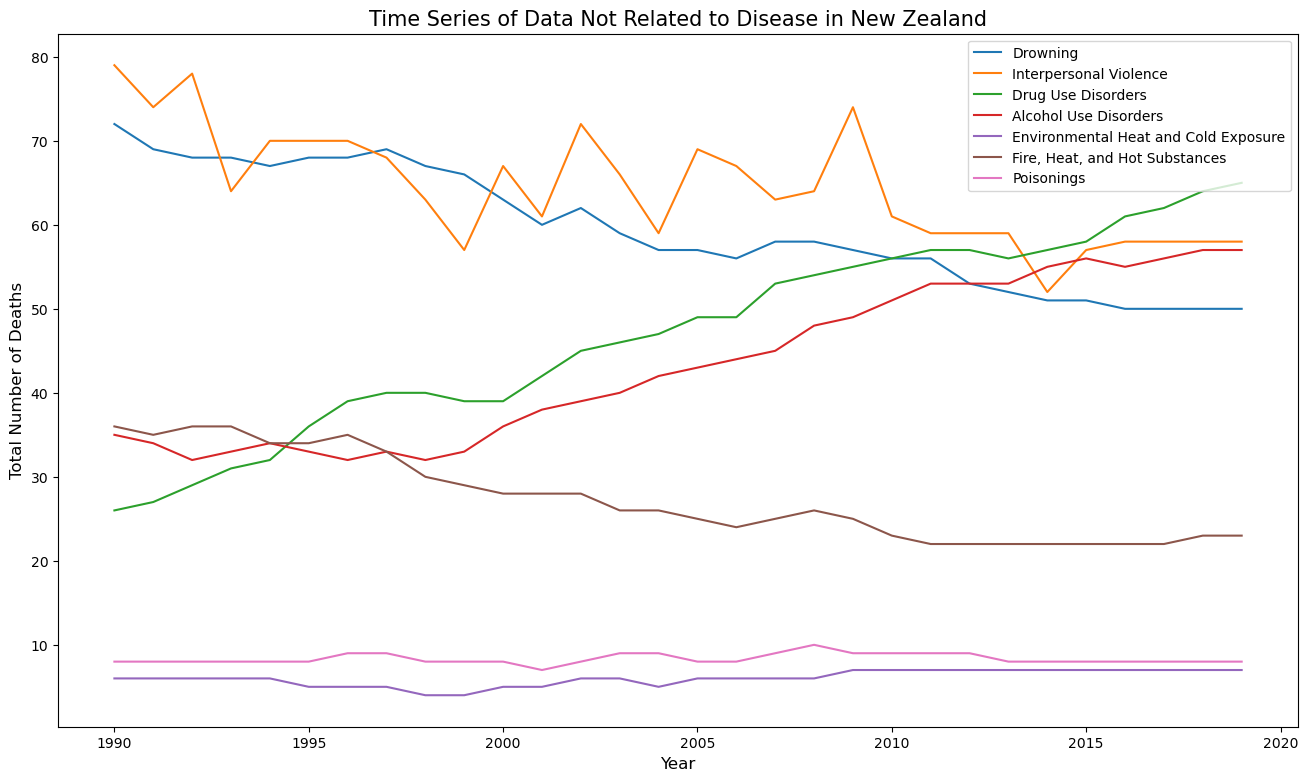

In [52]:
interest_data = ['Drowning', 
                 'Interpersonal Violence', 
                 'Drug Use Disorders',
                 'Alcohol Use Disorders',
                 'Environmental Heat and Cold Exposure', 
                 'Fire, Heat, and Hot Substances',
                 'Poisonings']

plt.figure(figsize=(16,9))

for i in interest_data:
    sns.lineplot(data = New_Zealand, 
                 x = 'Year', 
                 y = New_Zealand[i],
                 label = i
                )
    
plt.xlabel('Year',fontsize =12)
plt.ylabel('Total Number of Deaths',fontsize =12)
plt.title('Time Series of Data Not Related to Disease in New Zealand', fontsize=15)

plt.show()

# 17. Bar Chart Race of Data Not Related to Disease in New Zealand

In [53]:
#Create a new data frame for only interested data columns

NZ_race = New_Zealand[interest_data].reset_index(drop=True)

NZ_race.head()

,Drowning,Interpersonal Violence,Drug Use Disorders,Alcohol Use Disorders,Environmental Heat and Cold Exposure,"Fire, Heat, and Hot Substances",Poisonings
0,72,79,26,35,6,36,8
1,69,74,27,34,6,35,8
2,68,78,29,32,6,36,8
3,68,64,31,33,6,36,8
4,67,70,32,34,6,34,8


In [54]:
#Set column 'Year' to be the index

NZ_race = NZ_race.set_index(New_Zealand['Year'])
NZ_race

,Drowning,Interpersonal Violence,Drug Use Disorders,Alcohol Use Disorders,Environmental Heat and Cold Exposure,"Fire, Heat, and Hot Substances",Poisonings
Year,,,,,,,
1990,72,79,26,35,6,36,8
1991,69,74,27,34,6,35,8
1992,68,78,29,32,6,36,8
1993,68,64,31,33,6,36,8
1994,67,70,32,34,6,34,8
1995,68,70,36,33,5,34,8
1996,68,70,39,32,5,35,9
1997,69,68,40,33,5,33,9
1998,67,63,40,32,4,30,8


In [55]:
#Bar chart race

bcr.bar_chart_race(NZ_race, 
                   n_bars = 7,
                   orientation='h',
                   sort='desc',
                   period_length=1000,
                   fixed_max=True, fixed_order=False,
                   figsize=(4, 3), period_fmt='Year {x:.0f}', 
                   title='Compare Data Not Related to Disease in NZ')


I tried to make many options for the data visualisation such as

- Bar Chart
- Column Chart
- Line Chart
- Pie Chart
- Donut Chart
- Tree Map
- Clonopleth Map
- Interactive Choropleth Map
- Bar Chart Race


I am very new at Kaggle, so it should be usulful for me to practice and be able to look back at the code in the future. 

Any suggestions or comments would be appreciated. 

Thank you. :)